# Analytics Analysis

In [1]:
# importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir( os.path.join("..", "..") )

from Code.src.modules.db_ops import *
from Code.src.modules.dataManager import DataManager
from Code.src.modules.eda import *

DM = DataManager()

In [2]:
# Importing the data
df_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'pkl', 'processed')
db_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'db', 'processed')

In [5]:
# Creating a new folder to store the output, if it doesn't exist
try:
    os.mkdir( os.path.join("Data", "02_processed", "BernieAnalytics") )
except:
    pass

In [3]:
df_finalEnrollment.reg_status.value_counts()

**Web Registered**                50631
Wait Listed                        4212
**Registered**                     2981
Drop-Course Cancelled               959
Drop/Delete                         485
Web Drop (Liability)                115
Web Withdrawal                       20
Registered for Audit                  2
Selective Withdrawal Exception        2
Withdrawal from Course                2
Name: reg_status, dtype: int64

# Core Course Demands in first semester

## Tables

### MS Data Analytics Engineering

First Semester Course Demand
- International Students only
- Fall Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [7]:
query1 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Fall'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

In [8]:
query1

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Fall 2018,83,63,41,58,51
1,Fall 2019,78,59,46,59,51
2,Fall 2020,53,32,34,36,27
3,Fall 2021,149,131,116,132,94
4,Fall 2022,189,183,89,186,159


In [9]:
# query1.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Fall only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [10]:
query2 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query2.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

First Semester Course Demand
- International Students only
- Spring Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [11]:
query2

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Spring 2018,40,21,24,22,18
1,Spring 2019,48,28,23,33,24
2,Spring 2020 - COVID-19,66,43,41,52,44
3,Spring 2021,82,68,64,65,41
4,Spring 2022,119,112,82,113,76
5,Spring 2023,143,127,67,140,122


In [12]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [13]:
query3 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

First Semester Course Demand
- International Students only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [14]:
query3.T

,0,1,2,3,4,5,6,7,8,9,10
Semester,Spring 2018,Fall 2018,Spring 2019,Fall 2019,Spring 2020 - COVID-19,Fall 2020,Spring 2021,Fall 2021,Spring 2022,Fall 2022,Spring 2023
Total International Students Admitted,40,83,48,78,66,53,82,149,119,189,143
AIT 580,21,63,28,59,43,32,68,131,112,183,127
CS 504,24,41,23,46,41,34,64,116,82,89,67
STAT 515,22,58,33,59,52,36,65,132,113,186,140
OR 531,18,51,24,51,44,27,41,94,76,159,122


In [15]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

## Charts:
`Demand Comparison among Core Courses for Data Analytics Engineering Program`

### TODO:
- [x] Add the table at the bottom of each chart
- [ ] Feedback from Dan/Prof
- [ ] Do this in Tableau now

In [5]:
def chart(  # Defining a function to generate a chart of the number of students registered for each course in a given program.
        prog = 'MS Data Analytics Engineering',
        crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
        include_tot_intake = False,
        status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
        term_name = None,
        debug_mode = False
    ):
    """
    A function to generate a chart of the number of students registered for each course in a given program.

    Parameters
    ----------
    prog : str
        The program name to query for.
    crs_list : list
        A list of courses to query for.
    include_tot_intake : bool
        Whether to include the total number of students admitted to the program in the chart.
    status_list : list
        A list of registration statuses to query for.
    term_name : str
        The term name to query for. If None, all terms will be queried.

    Returns
    -------
    None
        Plots a chart of the number of students registered for each course in a given program.
    """
    str_crs_cond = ""
    for crs in crs_list:
        str_crs_cond += f"\n\t\t,SUM(CASE WHEN crs = '{crs}' THEN 1 ELSE 0 END) AS '{crs}'"
    
    if include_tot_intake:
        tot_intake = ",COUNT(DISTINCT stu_id) AS 'Total Semester Intake'"
    else:
        tot_intake = "-- Not including Total Semester Intake"
    
    if term_name is None:
        term_cond = "-- All Terms"
    else:
        term_cond = f"AND reg_term_name = '{term_name}'"

    query = f""" --sql
        SELECT
            stu_admit_term_desc AS Semester
            {str_crs_cond}
            {tot_intake}
        FROM EnrollmentFinalStatus
        WHERE
                    stu_visa = 'F1 Visa'
            AND     stu_prog_desc = '{prog}'
            AND     stu_admit_term_year > 2017
            AND     reg_status IN {str(tuple(status_list))}
            AND     reg_term_desc = stu_admit_term_desc
            {term_cond}
        GROUP BY
            stu_admit_term_desc
        ORDER BY
            stu_admit_term_code
    """

    df = db_finalEnrollment.runQuery(query) \
        .set_index('Semester')
    
    if debug_mode:
        print("="*40, "QUERY", "="*40)
        print(query)
        print("="*40, "Data ", "="*40)
        print(df.T)
    
    # Chart Method 1: Directly plotting without subplots
    df \
    .plot(kind='line', figsize=(15, 7),
                title = f"Course Demand / Student Preferences for their first Semester\n{prog}\n{str(tuple(status_list))}",
                xticks = [],
                yticks = list(range(0, df.values.max()+25, 25)),
                xlabel = "",
                ylabel = "Student Demand",
                grid = True)

    table = plt.table(
        cellText=df.T.values, rowLabels=df.T.index, colLabels=df.T.columns,\
            loc='bottom', cellLoc='center', snap=False
        )
    # Space between table and chart
    plt.subplots_adjust(bottom=0.2)
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1, 1.5)
    

    # Chart Method 2: Using subplots
    # fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 6))
    
    # ax1.plot(df.values, linewidth=1)
    
    # ax1.set_title(f"Course Demand / Student Preferences for their first Semester\n{prog}\n{str(tuple(status_list))}")
    # ax1.set_xlabel("Semesters")
    # ax1.set_ylabel("Student Demand")
    
    # ax1.grid(True)
    # ax1.set_xticklabels(df.index)
    
    # ax2.table(cellText=df.T.values, rowLabels=df.T.index, colLabels=df.T.columns, loc='bottom')
    # plt.show()

# # Testing the function
# chart(
#     prog = 'MS Data Analytics Engineering',
#     crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
#     include_tot_intake = False,
#     status_list = ["**Web Registered**", "**Registered**"],
#     term_name = None
# )

### MS Data Analytics Engineering

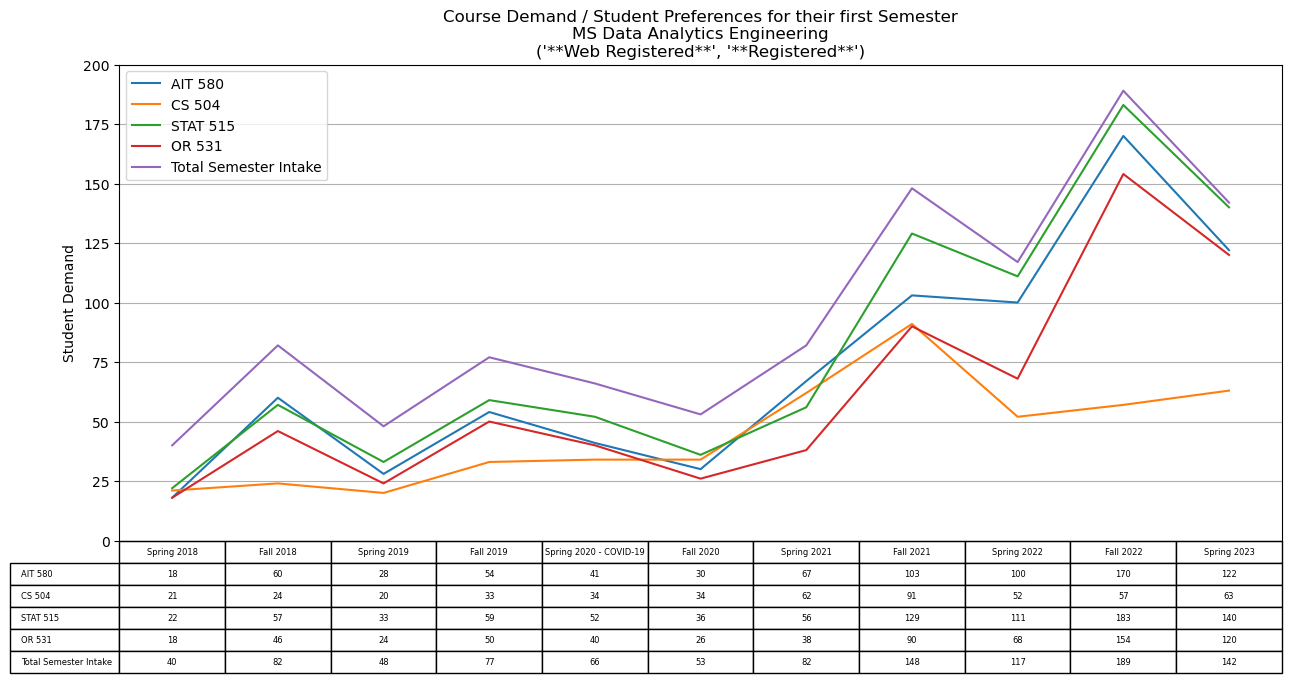

In [6]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
    include_tot_intake = True,
    status_list = ["**Web Registered**", "**Registered**"],
    term_name = None
)

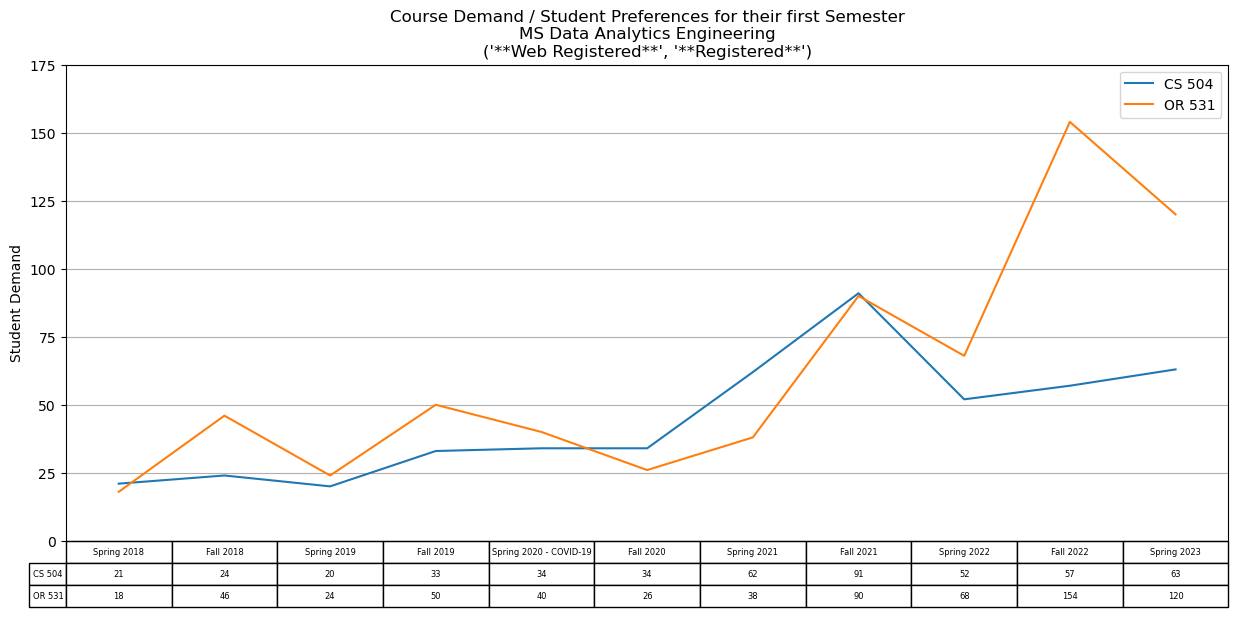

In [186]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['CS 504', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "**Registered**"],
    term_name = None
)

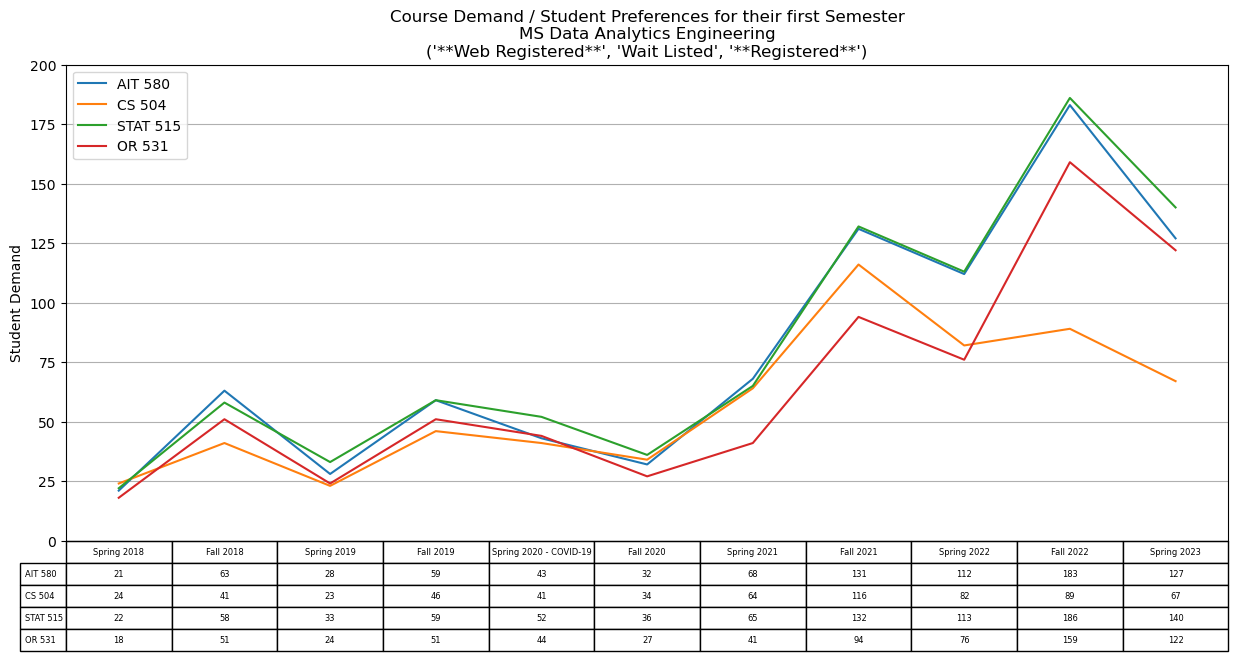

In [7]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None
)

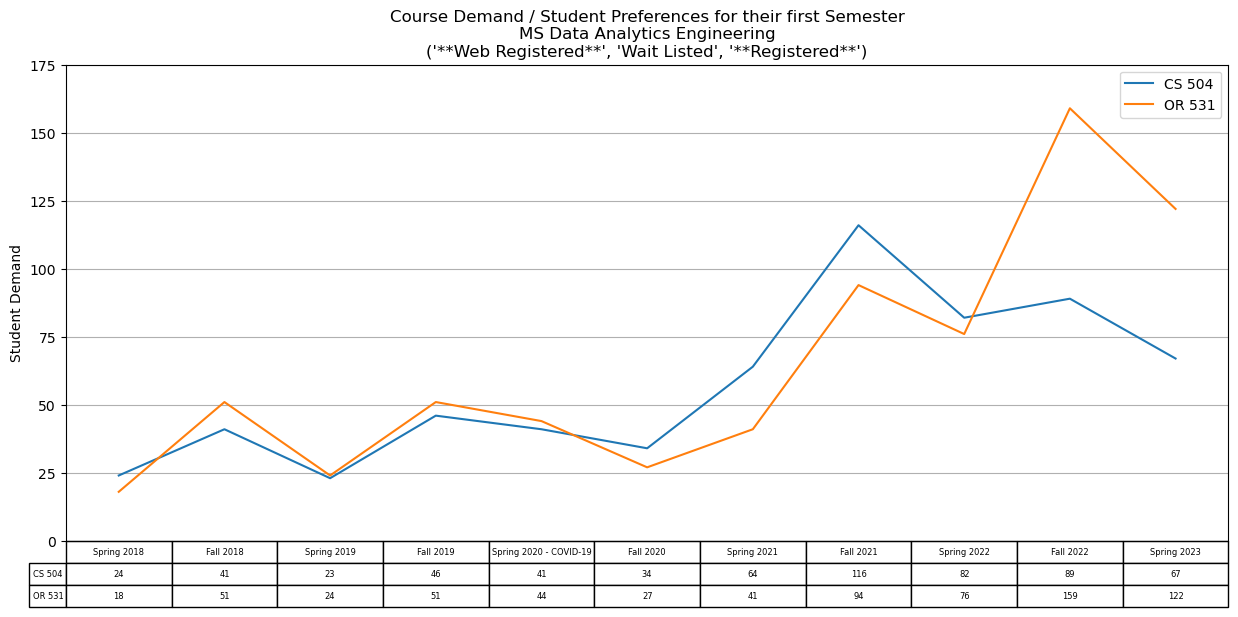

In [188]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['CS 504', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None
)

### MS Computer Science

In [190]:
df_finalEnrollment.stu_prog_desc.unique()

['MS Information Systems', 'MS Infrmatn Security & Assrnce', 'MS Civil & Infrastructure Engr', 'MS Software Engineering', 'MS Computer Science', ..., 'MS Biostatistics', 'MENG GeoConStruct Engineering', 'MS Bioengineering', 'MS Cyber Security Engineering', 'MS Digital Forensics']
Length: 19
Categories (19, object): ['MENG GeoConStruct Engineering', 'MS Applied Info Technology', 'MS Bioengineering', 'MS Biostatistics', ..., 'MS Software Engineering', 'MS Statistical Science', 'MS Systems Engineering', 'MS Telecommunications']

## Calculating Average Demand of core courses in first semester

In [52]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        crs, stu_admit_term_desc,
        COUNT(DISTINCT stu_id) AS Average_Enrollment
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     crs IN ('AIT 580', 'CS 504', 'STAT 515', 'OR 531', 'OR 541', 'STAT 554', 'CS 584')
        --AND     reg_term_name = 'Fall'
    GROUP BY
        crs, stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""") \
    .groupby('crs') \
        .agg({'Average_Enrollment': 'mean'}) \
            .sort_values('Average_Enrollment', ascending=False) \
                .head(10)

,Average_Enrollment
crs,
STAT 515,81.454545
AIT 580,78.818182
OR 531,64.272727
CS 504,57.000000
SYST 584,11.500000
AIT 524,9.363636
AIT 582,6.333333
OR 541,6.300000
CFRS 661,6.000000


# Blah

In [195]:
db_finalEnrollment.runQuery(f""" --sql
    SELECT crs, stu_admit_term_desc, COUNT(DISTINCT stu_id) AS Total_Students
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Computer Science'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ('**Web Registered**', 'Wait Listed', '**Registered**')
        AND     reg_term_desc = stu_admit_term_desc
    GROUP BY
        crs, stu_admit_term_desc
    ORDER BY
        Total_Students DESC
""").head(60)

,crs,stu_admit_term_desc,Total_Students
0,CS 531,Fall 2022,407
1,CS 530,Fall 2022,392
2,CS 550,Fall 2022,253
3,CS 583,Fall 2022,246
4,CS 584,Fall 2022,237
5,CS 580,Fall 2022,221
6,CS 531,Fall 2021,191
7,CS 530,Fall 2021,183
8,CS 550,Fall 2021,120
9,CS 583,Fall 2021,113


In [ ]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "**Registered**"],
    term_name = None
)

In [18]:
db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc, crs, COUNT(DISTINCT stu_id) AS dem_sem_1
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        --AND     crs IN ('AIT 580', 'CS 504', 'STAT 515', 'OR 531', 'OR 541', 'STAT 554', 'CS 584')
        AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc, crs
    ORDER BY
        stu_admit_term_code, dem_sem_1 DESC
""").pivot(
    index = 'crs',
    columns = 'stu_admit_term_desc',
    values = 'dem_sem_1'
).head(60)

stu_admit_term_desc,Spring 2018,Spring 2019,Spring 2020 - COVID-19,Spring 2021,Spring 2022,Spring 2023
crs,,,,,,
AIT 524,8.0,20.0,16.0,9.0,5.0,2.0
AIT 580,21.0,28.0,43.0,68.0,112.0,127.0
AIT 582,3.0,6.0,10.0,NaN,2.0,NaN
AIT 614,2.0,NaN,12.0,4.0,5.0,1.0
AIT 622,3.0,3.0,6.0,3.0,2.0,2.0
AIT 636,NaN,NaN,NaN,NaN,NaN,2.0
AIT 664,1.0,4.0,5.0,1.0,5.0,1.0
AIT 690,NaN,1.0,NaN,NaN,NaN,NaN
AIT 726,NaN,NaN,NaN,2.0,NaN,NaN
